In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel(r"/content/heart_disease.xlsx",sheet_name="Heart_disease")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
# Impute with the mean
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

<ipython-input-4-f7d2b8f4d62a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [ ]:
df.drop_duplicates(keep='first',ignore_index=True,inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
columns=df.select_dtypes('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.0+ KB


In [ ]:
# Convert all boolean columns to numeric
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

# Check the result
print(df.head())


   age   sex               cp  trestbps  chol  fbs         restecg  thalch  \
0   63  Male   typical angina       145   233    1  lv hypertrophy     150   
1   41  Male  atypical angina       135   203    0          normal     132   
2   57  Male     asymptomatic       140   192    0          normal     148   
3   52  Male   typical angina       118   186    0  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201    0          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    int64  
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 92.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#converting categorical to numeric using labelencoder method

In [ ]:
lr=LabelEncoder()

In [ ]:
df['sex']=lr.fit_transform(df['sex'])
df['cp']=lr.fit_transform(df['cp'])
df['restecg']=lr.fit_transform(df['restecg'])
df['slope']=lr.fit_transform(df['slope'])
df['thal']=lr.fit_transform(df['thal'])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,False,2.3,0,0,0
1,41,1,1,135,203,0,1,132,False,0.0,1,0,0
2,57,1,0,140,192,0,1,148,False,0.4,1,0,0
3,52,1,3,118,186,0,0,190,False,0.0,1,0,0
4,57,1,0,110,201,0,1,126,True,1.5,1,0,0


In [ ]:
df['exang']=df.exang.astype(object)

In [ ]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [ ]:
# Standardize 'exang' values
df['exang'] = df['exang'].map({
    False: 0,
    True: 1,
    'FALSE': 0,
    'TURE': 1
})

# Check the result
print(df['exang'].unique())


[0 1]


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
z=df.corr()
z

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.051947,-0.068305,0.253709,-0.100059,0.177004,-0.008336,-0.327868,0.192202,0.233265,-0.053886,0.058829,0.326227
sex,0.051947,1.000000,-0.125986,0.015988,-0.191632,0.092480,0.077376,-0.178484,0.186884,0.101743,-0.044191,0.068596,0.259258
cp,-0.068305,-0.125986,1.000000,0.007944,0.071005,-0.044562,-0.074455,0.249440,-0.345866,-0.169497,0.094762,-0.079809,-0.314480
trestbps,0.253709,0.015988,0.007944,1.000000,0.117392,0.112124,0.056824,-0.132841,0.151086,0.153034,0.008262,0.056620,0.136581
chol,-0.100059,-0.191632,0.071005,0.117392,1.000000,-0.113651,-0.195021,0.198074,-0.037256,0.028901,0.047655,-0.016900,-0.239065
fbs,0.177004,0.092480,-0.044562,0.112124,-0.113651,1.000000,0.068311,-0.065827,0.028502,0.022296,-0.027616,-0.017400,0.156839
restecg,-0.008336,0.077376,-0.074455,0.056824,-0.195021,0.068311,1.000000,-0.194343,0.083724,-0.030135,-0.082107,-0.111874,0.035053
thalch,-0.327868,-0.178484,0.249440,-0.132841,0.198074,-0.065827,-0.194343,1.000000,-0.348668,-0.129435,0.223212,0.005985,-0.322632
exang,0.192202,0.186884,-0.345866,0.151086,-0.037256,0.028502,0.083724,-0.348668,1.000000,0.371124,-0.159975,0.086220,0.358837
oldpeak,0.233265,0.101743,-0.169497,0.153034,0.028901,0.022296,-0.030135,-0.129435,0.371124,1.000000,-0.186815,0.090359,0.417724


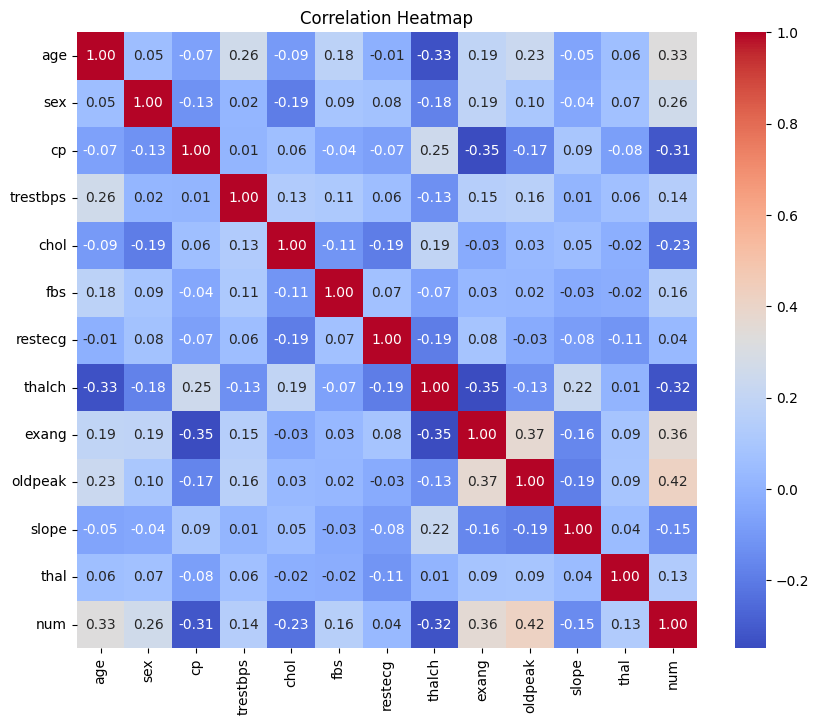

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Key Observations from the Heatmap:
#Correlation with Target Variable (num):
#The target variable num shows:
#A moderate positive correlation with oldpeak (0.42), suggesting that higher oldpeak values might be associated with heart disease.
#A moderate positive correlation with exang (0.36), indicating exercise-induced angina may be linked to heart disease.
#A weak positive correlation with age (0.33) and sex (0.26), meaning these features might contribute to heart disease but are less impactful.
#High Inter-feature Correlations:
#thal and exang: Show a positive correlation of around 0.37, indicating a potential relationship between these features.
#thalach and cp: Exhibit a moderate negative correlation (-0.35), suggesting that chest pain types are inversely related to maximum heart rate.
#Low or No Correlation:
#Many features (e.g., fbs, trestbps, chol) exhibit weak or negligible correlation with num (close to 0). These features might have minimal impact on predicting heart disease in isolation.
#Negative Correlations:
#thalach (maximum heart rate) has a negative correlation (-0.32) with num, suggesting that lower maximum heart rates are associated with heart disease.
#cp (chest pain type) also has a negative correlation (-0.31) with num, indicating that specific chest pain types might be inversely related to heart disease.
#Feature Relationships:
#age and trestbps: Show a moderate positive correlation (0.26), implying that age might slightly affect resting blood pressure.
#chol and trestbps: Have a weak positive correlation (0.19), indicating some connection between cholesterol and resting blood pressure.


<Axes: >

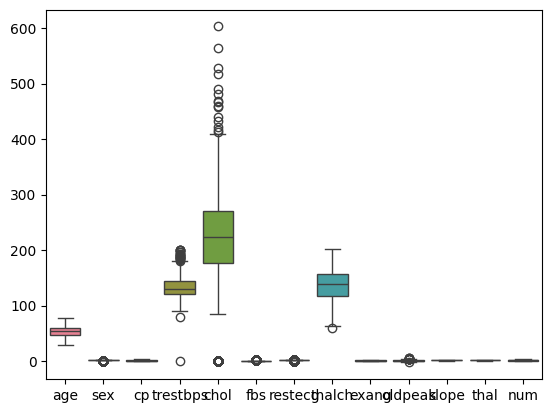

In [ ]:
sns.boxplot(data=df)

In [ ]:
# List of columns to handle outliers
columns_to_cap = ['trestbps', 'chol']  # Replace with your columns

# Function to cap and floor outliers
def cap_and_floor_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1               # Interquartile range

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping and flooring
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

In [ ]:
# Apply the function
df = cap_and_floor_outliers(df, columns_to_cap)

# Display the updated DataFrame
print(df)

     age  sex  cp  trestbps    chol  fbs  restecg  thalch  exang   oldpeak  \
0     63    1   3       145  233.00    1        0     150      0  2.300000   
1     41    1   1       135  203.00    0        1     132      0  0.000000   
2     57    1   0       140  192.00    0        1     148      0  0.400000   
3     52    1   3       118  186.00    0        0     190      0  0.000000   
4     57    1   0       110  201.00    0        1     126      1  1.500000   
..   ...  ...  ..       ...     ...  ...      ...     ...    ...       ...   
902   53    1   0       125   36.25    0        1     120      0  1.500000   
903   62    1   0       166  170.00    0        2     120      1  3.000000   
904   56    1   2       170   36.25    0        0     123      1  2.500000   
905   56    1   2       144  208.00    1        2     105      1  0.891253   
906   57    1   0       142  277.00    1        2     182      0  0.891253   

     slope  thal  num  
0        0     0    0  
1        1     

In [ ]:
#removing outliers using cap and floor

<Axes: >

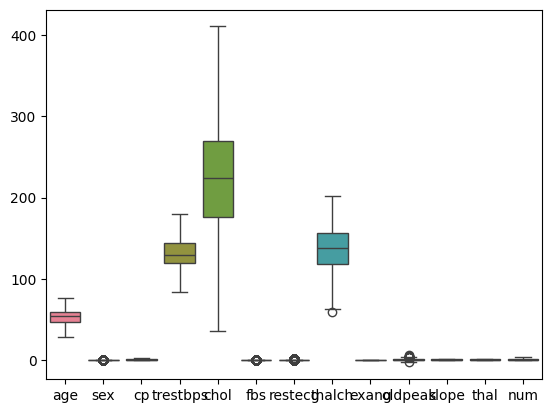

In [ ]:
sns.boxplot(df)

In [ ]:
x=df.drop(columns='num')
y=df['num']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training set size: {y_train.shape}")
print(f"Testing set size: {y_test.shape}")

Training set size: (634, 12)
Testing set size: (273, 12)
Training set size: (634,)
Testing set size: (273,)


In [ ]:
# Initialize the decision tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.58

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       122
           1       0.49      0.59      0.53        83
           2       0.25      0.20      0.22        30
           3       0.33      0.25      0.29        28
           4       0.00      0.00      0.00        10

    accuracy                           0.58       273
   macro avg       0.37      0.37      0.36       273
weighted avg       0.55      0.58      0.56       273


Confusion Matrix:
 [[97 19  3  3  0]
 [20 49 10  4  0]
 [ 4 15  6  5  0]
 [ 4 15  2  7  0]
 [ 2  3  3  2  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Inference for Decision Tree Algorithm on Heart Disease Dataset
#Performance Metrics:
#Accuracy (58%):
#The model correctly classifies 58% of the test dataset.
#This indicates moderate performance, but there is room for improvement.
#Precision:
#Class 0: Precision is 76%, indicating good performance for identifying patients without heart disease.
#Class 1: Precision is 50%, showing moderate reliability in identifying patients with mild heart disease.
#Class 2 and Class 3: Precision is 32% and 30%, respectively, showing poor identification of these classes.
#Class 4: Precision is 0%, which indicates the model is unable to identify this category.
#Recall:
#Class 0: Recall is 79%, indicating most true negatives (patients without heart disease) are correctly identified.
#Class 1: Recall is 57%, suggesting moderate performance for this class.
#Class 2 and Class 3: Recall is 27% and 29%, indicating many false negatives for these classes.
#Class 4: Recall is 0%, meaning this class is entirely missed by the model.
#F1-Score:
#Class 0 has the highest F1-score (77%), showing balanced precision and recall.
#Classes 1, 2, and 3 have F1-scores of 53%, 29%, and 29%, indicating suboptimal performance for these categories.
#Class 4 has an F1-score of 0%, meaning the model fails to predict this class altogether.
#Macro Average (38%):
#Averages performance across all classes without considering class distribution.
#Indicates poor performance overall due to weak predictions for minority classes.
#Weighted Average (57%):
#Reflects the overall performance by considering class frequencies.
#Slightly better due to the dominant class (Class 0) being correctly identified more often.
#Confusion Matrix Analysis:
#The confusion matrix reveals the following:
#Class 0 (No Heart Disease):
#96 true positives, but 18 instances are misclassified as Class 1.
#Minimal misclassification into other categories.
#Class 1 (Mild Heart Disease):
#47 true positives, but significant overlap with Class 0 (20 misclassifications) and Class 2 (10 misclassifications).
#Class 2:
#Only 8 true positives with many instances misclassified as Class 1 (12) or Class 3 (6).
#Class 3:
#Poor predictions, with only 8 correctly identified instances and many misclassified into other categories.
#Class 4:
#No true positives, with all instances misclassified into other classes (primarily Classes 1, 2, and 3).


In [ ]:
#Key Observations:
#Imbalanced Performance Across Classes:
#The model performs well for the dominant Class 0 but struggles with minority classes, particularly Class 4.
#The poor recall for minority classes indicates the model is biased towards the majority class.
#Misclassification:
#High confusion between Classes 1, 2, and 3 suggests overlapping patterns in the features, making it difficult for the decision tree to differentiate them.
#Zero Predictions for Class 4:
#This class is entirely ignored, likely due to its small representation in the dataset. The model fails to learn patterns for this class.


In [ ]:
#Next Steps:
#Use Ensemble Methods:
#Apply Bagging (e.g., Random Forest) or Boosting (e.g., AdaBoost, Gradient Boosting) to enhance model robustness.
#These methods can reduce overfitting and improve generalization, especially for minority classes.
#Conclusion:
#The Decision Tree model shows moderate performance for the heart disease dataset, primarily excelling with the majority class (Class 0).
# However, it struggles with minority classes, especially Class 4, due to class imbalance and possible overlapping feature distributions.
#Improvements through data preprocessing, hyperparameter tuning, and ensemble methods are necessary to enhance predictions.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
dt = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}



In [ ]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.5536682914635671


In [ ]:
#Number of Hyperparameter Combinations Explored
#A total of 576 hyperparameter combinations were tested across 5 folds, resulting in 2880 fits.
#This shows that a thorough grid search was conducted, testing a wide variety of hyperparameter values.
#Best Parameters
#The hyperparameters that gave the best accuracy during the grid search are:
#class_weight: None
# No adjustments were made for class imbalance.
#criterion: gini
# The Gini impurity was used as the metric to evaluate splits.
#max_depth: 3
# The tree was restricted to a maximum depth of 3, indicating that limiting the complexity of the tree led to better performance.
#max_features: log2
# The number of features considered for each split was limited to the logarithm base 2 of the total features.
#min_samples_leaf: 1
# A leaf node could contain as few as 1 sample.
#min_samples_split: 2
# A node required at least 2 samples to be split.
#These settings suggest that a relatively shallow tree with minimal constraints on splits performed best for the dataset.
 #Accuracy
#Best Accuracy: 0.5537 (approximately 55.37%).
#This is the mean cross-validation accuracy achieved using the best hyperparameters.
#Implication:
#The accuracy of 55.37% indicates that the Decision Tree is moderately effective but not highly predictive for this dataset.
#Additional improvements may be necessary, such as:
#Trying different algorithms like Random Forest, Gradient Boosting, or AdaBoost.
#Engineering better features or addressing potential class imbalance.
#Key Insights
#The shallow tree (max_depth=3) implies that the dataset may not require a very complex model for splitting and classification,
# or that deeper trees could lead to overfitting.
#The use of "log2" for max_features helps limit the number of features used in each split, which might reduce overfitting and improve generalization.
#The performance could potentially be affected by:
#Class imbalance: Consider setting class_weight='balanced' to account for uneven class distributions.
#Dataset features: The features may lack sufficient predictive power, suggesting a need for better feature engineering or data preprocessing.


In [ ]:
#Interview question and answers

In [ ]:
#Decision tree models have several hyperparameters that significantly impact their performance, interpretability,
# and ability to generalize to unseen data. Here’s a list of common hyperparameters, their roles, and how they affect the model:
#Max Depth (max_depth)
#Definition: The maximum number of levels in the tree.
#Effect:
#A smaller max_depth restricts the tree from growing too deep, reducing the risk of overfitting but potentially causing underfitting if the depth is too small.
#A larger max_depth allows the tree to model complex patterns but may lead to overfitting, especially with noisy data.
#Default: Typically unlimited, leading to fully grown trees.
#Minimum Samples Split (min_samples_split)
#Definition: The minimum number of samples required to split an internal node.
#Effect:
#A larger value prevents the tree from splitting small nodes, leading to a simpler model that reduces overfitting but may underfit.
#A smaller value allows more splits, potentially capturing finer patterns but increasing the risk of overfitting.
#Default: Often set to 2.
#Minimum Samples Leaf (min_samples_leaf)
#Definition: The minimum number of samples required to be at a leaf node.
#Effect:
#A larger value forces leaf nodes to contain more samples, resulting in smoother and more generalized predictions.
#A smaller value allows finer splits, increasing model complexity but potentially leading to overfitting.
#Default: Typically 1.
#Maximum Features (max_features)
#Definition: The number of features to consider when looking for the best split.
#Effect:
#A smaller value (e.g., square root or log of the total features) reduces overfitting, especially in high-dimensional data, by introducing randomness.
#Using all features may lead to overfitting but can work well for smaller datasets.
#Default: Depends on the library (e.g., None in sklearn uses all features).
#Maximum Leaf Nodes (max_leaf_nodes)
#Definition: The maximum number of leaf nodes in the tree.
#Effect:
#Limiting the number of leaf nodes simplifies the tree and reduces overfitting.
#An unlimited number of leaf nodes allows the tree to grow fully, which may overfit the training data.
#Default: Unlimited.
#Minimum Impurity Decrease (min_impurity_decrease)
#Definition: The minimum reduction in impurity (e.g., Gini or entropy) required for a split to occur.
#Effect:
#A larger value prevents splits that offer minimal improvement, simplifying the tree and reducing overfitting.
#A smaller value allows more splits, increasing the tree's complexity.
#Default: 0.
#Criterion (criterion)
#Definition: The function to measure the quality of a split.
#Common options:
#Gini Index (default for classification): Measures impurity.
#Entropy: Measures information gain.
#Mean Squared Error (MSE) (for regression): Measures variance reduction.
#Effect:
#Choice of criterion can slightly impact performance, but the difference is usually problem-specific.
#Splitter (splitter)
#Definition: The strategy used to choose the split at each node.
#Common options:
#Best: Selects the best split among all features.
#Random: Selects the best split among a random subset of features.
#Effect:
#Best typically yields more accurate trees but can be computationally expensive.
#Random introduces randomness, which can improve generalization, especially in ensemble methods like Random Forests.
#Class Weight (class_weight)
#Definition: Assigns weights to classes to handle class imbalance.
#Effect:
#Higher weights for minority classes improve the tree's sensitivity to those classes.
#Improper weights can distort predictions.
#Default: None or balanced (automatically adjusts based on class frequencies).
 #Max Samples (max_samples)
#Definition: In ensemble methods like Random Forest, this specifies the maximum number of samples used for training each tree.
#Effect:
#Smaller subsets introduce randomness, improving generalization.
#Larger subsets may lead to overfitting.




In [ ]:
#Effects of Hyperparameters on Performance
#Overfitting:
#Caused by large max_depth, small min_samples_split, small min_samples_leaf, or large max_features.
#Leads to poor generalization on unseen data.
#Underfitting:
#Caused by small max_depth, large min_samples_split, or large min_samples_leaf.
#Leads to poor performance on both training and test data.
#Bias-Variance Tradeoff:
#Hyperparameters like max_depth and min_samples_leaf need to balance model complexity and generalization.


In [ ]:
#What is the difference between the Label encoding and One-hot encoding?
#Label encoding and one-hot encoding are techniques used to convert categorical data into numerical format for machine learning algorithms.
#While they serve the same purpose, they differ in their implementation and how they handle categorical values.
#Label Encoding
#Definition: Label encoding converts each unique category in a column to an integer value.
#How It Works: Each category is assigned a unique integer based on a predefined order or their occurrence.
#Advantages:
#Simple and efficient for ordinal (ranked) categories (e.g., Low, Medium, High).
#Uses less memory compared to one-hot encoding since it doesn’t create additional columns.
#Disadvantages:
#Implies an ordinal relationship between the categories, which can mislead the model if the categories are nominal.
#One-Hot Encoding
#Definition: One-hot encoding creates binary (0 or 1) columns for each unique category. Each row will have a 1 in the column corresponding to its category and 0 elsewhere.
#How It Works: Each unique category becomes a new column.
#Advantages:
#Suitable for nominal categories where no ordinal relationship exists.
#Ensures that the model doesn’t assume a numerical relationship between categories.
#Disadvantages:
#Can lead to high memory usage for features with many unique categories (high cardinality), as it creates a new column for each category.
#The resulting dataset becomes sparse due to the large number of zeros.


In [ ]:
#When to Use Which?
#Label Encoding:
#Use when the categories have a meaningful order or ranking (e.g., Low, Medium, High).
#Suitable for tree-based algorithms (e.g., Decision Trees, Random Forests) that are insensitive to numerical scales.
#One-Hot Encoding:
#Use for nominal categories (e.g., Color: Red, Green, Blue) with no inherent order.
#Essential for linear models and distance-based algorithms like SVMs and KNN, where numerical scales affect the outcome.
